## **Predictive Model using Linear Regression**

## Project Objective:

To determine if investing in website or online app have more positive impact to the business' profitability.

## **Process:**

This interesting project will start off with basic descriptive analysis, followed by data cleansing, and scaling the data to prepare for machine learning model from sklearn library. The model will be visualized and evaluated using metrics, such as MAE, MSE, and RMSE.

# Positive impact:

The business will gain actionable insights to their question, if investing more in the website or app will have significant financial impact. Having a deeper understanding of the data using advanced data analysis can help businesses make the best available decision and deploy an effective business strategies.

# About Dataset

Dataset used: '/content/Ecommerce Customers.csv'

This file has customer email, avg. seesion time with stylist, Time spent on the app and website, Length of Menbeship

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [ ]:
df = pd.read_csv(r'/content/Ecommerce Customers.csv')

In [ ]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [53]:
scaler = MinMaxScaler()

**The variables X and y is created. The y-variable "Yearly Amount Spent" is our target feature, is what the model will be predicting on.**

Noted that the email, address, and avatar are customer-specific and do not contribute much to the machine learning later. Will drop these features.

In [54]:
X = df.drop(columns = ['Yearly Amount Spent','Email', 'Address', 'Avatar'])
y = df['Yearly Amount Spent']

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2,random_state = 2)

The data is scaled. Noted that the fit_transform is not used on X_test to prevent leakage.

In [58]:
scaled = scaler.fit_transform(X_train,y_train)
scaled_test = scaler.transform(X_test)

In [ ]:

lr = LinearRegression()

# Fitting the data into model

In [59]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)


In [ ]:




mean_absolute_error(y_test,y_pred)

7.182689233710765

In [ ]:
print("Accuracy of training dataset:",lr.score(X_train,y_train))
print("Accuracy of test dataset:",lr.score(X_test,y_test))

Accuracy of training dataset: 0.9832679605683918
Accuracy of test dataset: 0.9878559970002221


The model's prediction power is visualized in the scatterplot below. It has an apparent linear relation with very little noise.

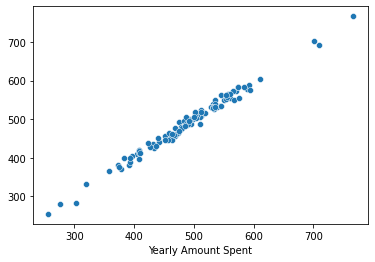

In [ ]:
sns.scatterplot(x=y_test, y=y_pred)

# Evaluating the model using the metrics from sklearn library.

In [ ]:
print('MAE : ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE : ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :  7.182689233710765
MSE :  81.22618909322294
RMSE :  9.012557300412738


In [48]:
#metrics.explained_varience_score(y_test,y_pred)
metrics.explained_variance_score(y_test, y_pred)

0.9878560133378431

In [50]:
model_coef = pd.DataFrame(lr.coef_,X.columns,columns =["Coefficient"])

In [51]:
model_coef

,Coefficient
Avg. Session Length,25.723477
Time on App,38.895700
Time on Website,0.496052
Length of Membership,61.438644


# Conclusion:


**From this project this concludes: 
1.the company should allocate more resourses on app**
 **2. yearly amount spent will be incresed by $61.43 for every 1 unit increase in Length of Membership**